In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

merged_df=pd.read_csv('merged_data.csv')
merged_df.head()

,# Transaction,invoice_no,customer_id,gender,age,category,quantity,TL price,payment_method,invoice_date,shopping_mall,Latitude,Longitude,Invoice Date,Month,date for query,Temp in F,TRY-USD fx rate,USD Price
0,0,I138884,C241288,Female,28,Clothing,4,16107.36,Credit Card,5/8/2022,Kanyon,41.078039,29.010781,8/5/2022,2022-08,8/15/2022,73.3,17.912600,899.219544
1,1,I289643,C584700,Female,43,Technology,2,490.36,Cash,22/08/2022,Kanyon,41.078039,29.010781,8/22/2022,2022-08,8/15/2022,73.3,18.105499,27.083484
2,2,I184307,C175946,Male,22,Food & Beverage,16,370.90,Credit Card,25/08/2022,Kanyon,41.078039,29.010781,8/25/2022,2022-08,8/15/2022,73.3,18.173301,20.409061
3,3,I818298,C204632,Male,21,Clothing,2,153.14,Debit Card,21/08/2022,Kanyon,41.078039,29.010781,8/21/2022,2022-08,8/15/2022,73.3,18.095979,8.462653
4,4,I215578,C866033,Male,39,Cosmetics,1,88.64,Credit Card,4/8/2022,Kanyon,41.078039,29.010781,8/4/2022,2022-08,8/15/2022,73.3,17.946800,4.939042


In [11]:
def metrics_distribution_by_attribute(df, attribute_name, title_ext="", fig_height = 6.5):
    #Define a list of metrics for analysis and their corresponding colors.

    metrics = ["USD Price", "quantity"]
    colors = ["blue", "red"]
   
    #Conduct an ANOVA test because it is versatile and allows comparing any number of groups with each other.
    #Iterate through all metrics.

    for metric in metrics:
        buckets = [] 

        for bucket, group in df.groupby(attribute_name):
            buckets.append(group[metric])

        statistic, pvalue = stats.f_oneway(*buckets)

        #Display the test results and conclusion, calculated based on the p-value.

        print(f"Statistic = {statistic}, p-value = {pvalue}")
        if pvalue < 0.05:
            print(f"H0 should be rejected, indicating that there are statistically significant differences in the distribution of {metric} by {attribute_name}.\n")
        else:
            print(f"H0 should be accepted, indicating that there are no statistically significant differences in the distribution of {metric} by {attribute_name}.\n")

    #Start creating a set of charts. Determine the size of the plotting area.

    fig = plt.figure(figsize=(12, fig_height))

    #Iterate through all metrics.

    i = 1
    for metric in metrics:
       
        #Find the color in the colors list that corresponds to the metric.
        color = colors[metrics.index(metric)]

        #Construct a bar chart that shows the aggregated average value of price/cost/quantity.
        #For its construction, grouping of the original DataFrame is performed on the fly, without saving the result of grouping in a new DataFrame.

        ax1 = fig.add_subplot(2, 2, i)
        df.groupby(attribute_name).agg({metric: "mean"}).plot(kind="bar", color=color, alpha=0.75, ax=ax1)
        
        #Increment the variable value to move to the next chart.
        i = i + 1

        #Construct a boxplot that shows the distribution of price/cost/quantity values.
        ax2 = fig.add_subplot(2, 2, i)
        df.boxplot(column=metric, by=attribute_name, ax=ax2)
        plt.xticks(rotation=90)
        #Increment the variable value to move to the next chart.
        i = i + 1

    fig.suptitle(f"Distribution USD Price and Quantity by {attribute_name} {title_ext}")
    plt.tight_layout() 
    plt.show()

In [13]:
#Create a new DataFrame
payment_method_df = merged_df[["USD Price", "quantity", "payment_method"]].copy()

#Explicitly set bins 
cost_group_bins = [0, 100, 1000, 10000]
cost_group_labels = ["Lower", "Middle", "Upper"]

payment_method_df["Price Group"] = pd.cut(payment_method_df["USD Price"], bins=cost_group_bins, labels=cost_group_labels)
payment_method_df.head()

,USD Price,quantity,payment_method,Price Group
0,899.219544,4,Credit Card,Middle
1,27.083484,2,Cash,Lower
2,20.409061,16,Credit Card,Lower
3,8.462653,2,Debit Card,Lower
4,4.939042,1,Credit Card,Lower


Power_divergenceResult(statistic=7960.901447102911, pvalue=0.0)


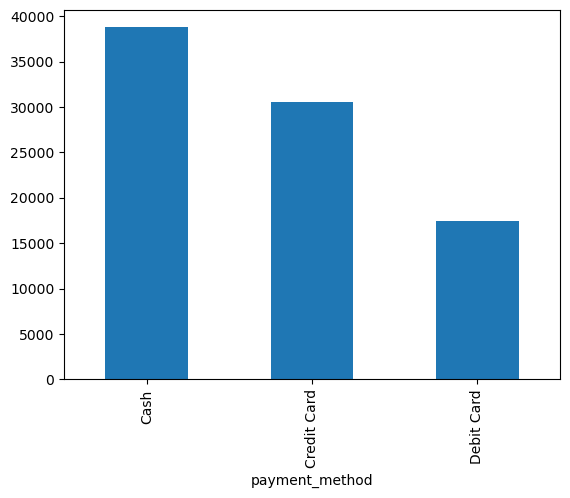

In [15]:
#Calculate the observed distribution of transaction counts by filtering by bucket number and grouping by payment method.
#Within each group, count the number of entries = number of transactions.
lower_bin_observed = payment_method_df[(payment_method_df["Price Group"] == "Lower")].groupby("payment_method").size()

#Calculate the expected count for each payment method as a uniform distribution, i.e., divide the sum of all transactions in the lower bin by 3 (the number of payment methods).
lower_bin_expected = [[sum(lower_bin_observed) / len(lower_bin_observed)] * len(lower_bin_observed)]

#Perform a chi-square test
print(stats.chisquare(f_obs=lower_bin_observed, f_exp=lower_bin_expected[0]))

lower_bin_observed.plot(kind="bar")
plt.show()

Power_divergenceResult(statistic=44.97872340425532, pvalue=1.709992915994642e-10)


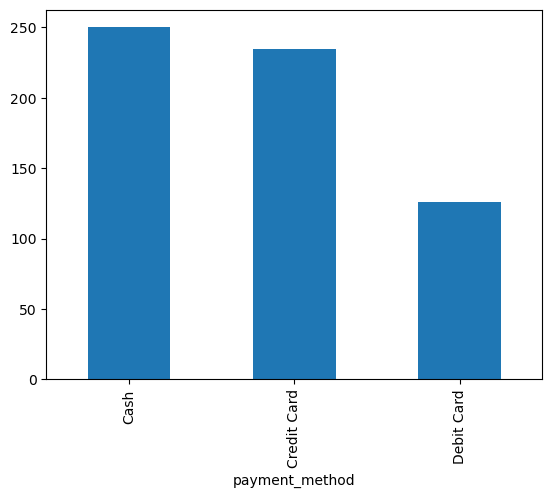

In [16]:
#Calculate the observed distribution of transaction counts by filtering by bucket number and grouping by payment method.
#Within each group, count the number of entries = number of transactions.
upper_bin_observed = payment_method_df[(payment_method_df["Price Group"] == "Upper")].groupby("payment_method").size()

#Calculate the expected count for each payment method as a uniform distribution, i.e., divide the sum of all transactions in the lower bin by 3 (the number of payment methods).
upper_bin_expected = [[sum(upper_bin_observed) / len(upper_bin_observed)] * len(upper_bin_observed)]

#Perform a chi-square test
print(stats.chisquare(f_obs=upper_bin_observed, f_exp=upper_bin_expected[0]))

upper_bin_observed.plot(kind="bar")
plt.show()

payment_method
Cash           38753
Credit Card    30496
Debit Card     17476
dtype: int64


Statistic = 1.088289946539551, p-value = 0.3367965333362535
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of USD Price by payment_method.

Statistic = 1.403481256764178, p-value = 0.24574557069386913
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of quantity by payment_method.



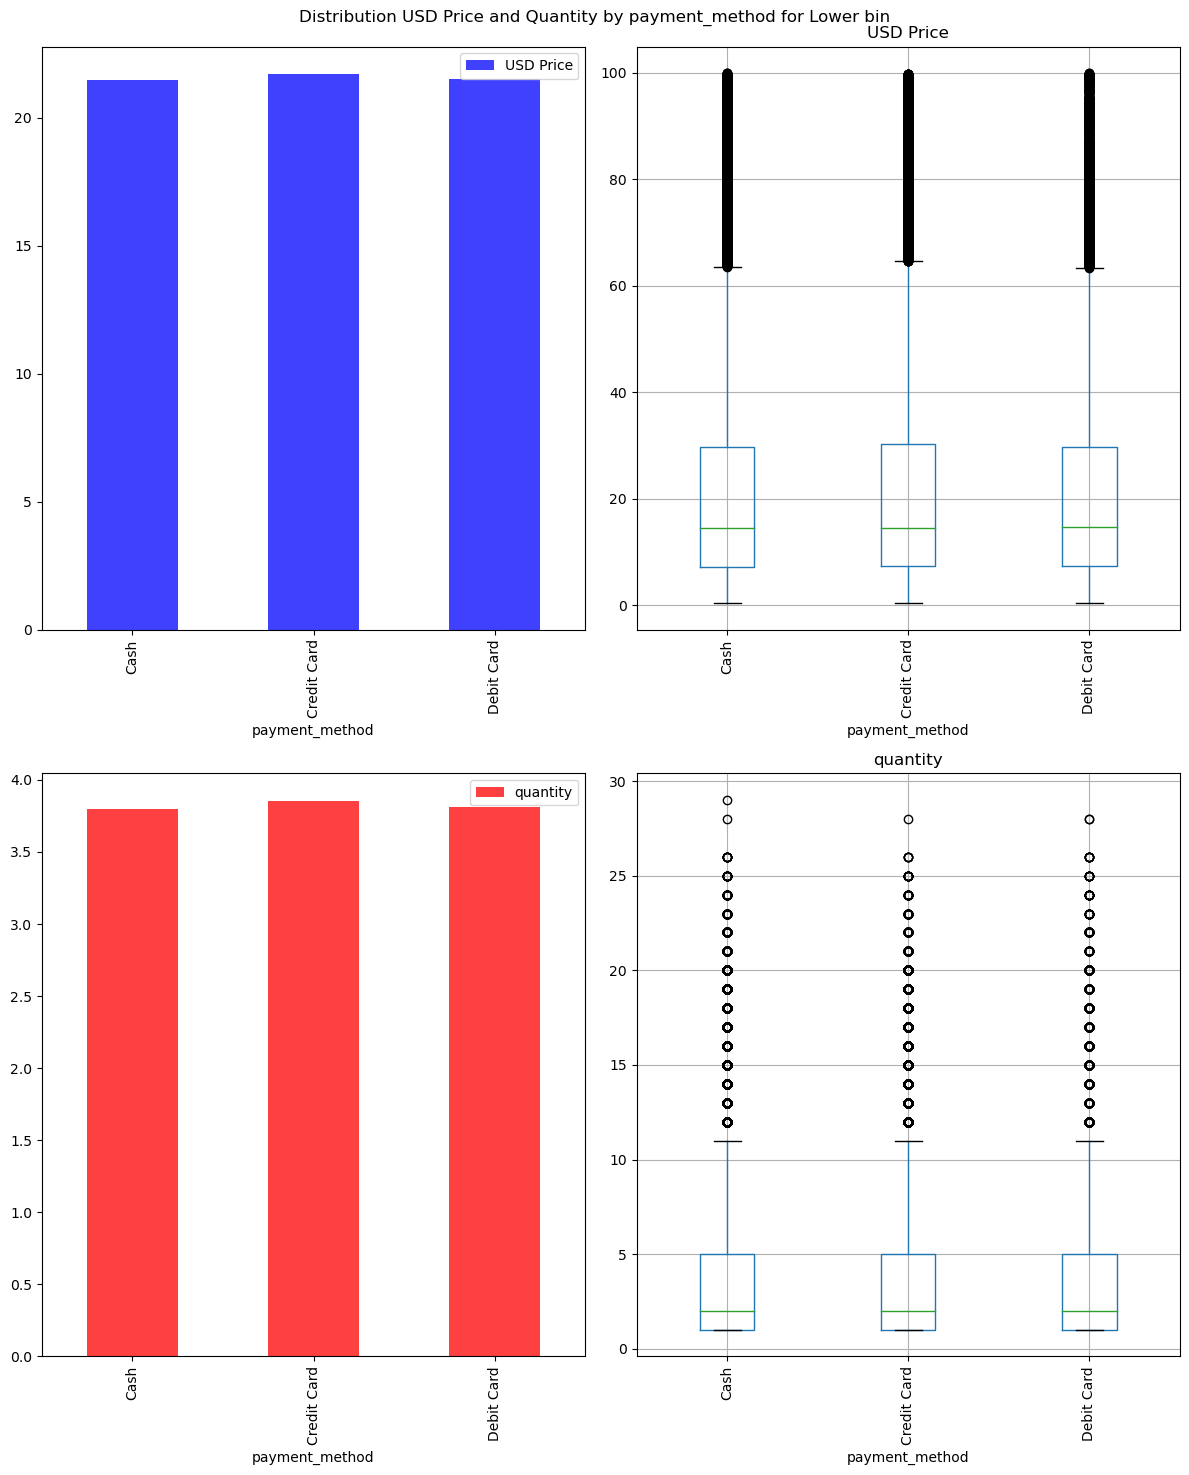

In [17]:
#Perform an ANOVA test for the distribution of Price/Cost/Quantity for each purchase by Payment Method in the Lower bin.
df = payment_method_df[(payment_method_df["Price Group"] == "Lower")]

#Display the number of transactions in each group.
print(payment_method_df[(payment_method_df["Price Group"] == "Lower")].groupby("payment_method").size())
print("\n")

metrics_distribution_by_attribute(df, attribute_name="payment_method", title_ext="for Lower bin", fig_height=15)

payment_method
Cash           250
Credit Card    235
Debit Card     126
dtype: int64


Statistic = 1.295779306290448, p-value = 0.27443919809689543
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of USD Price by payment_method.

Statistic = 0.24364669402301728, p-value = 0.7838409818498913
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of quantity by payment_method.



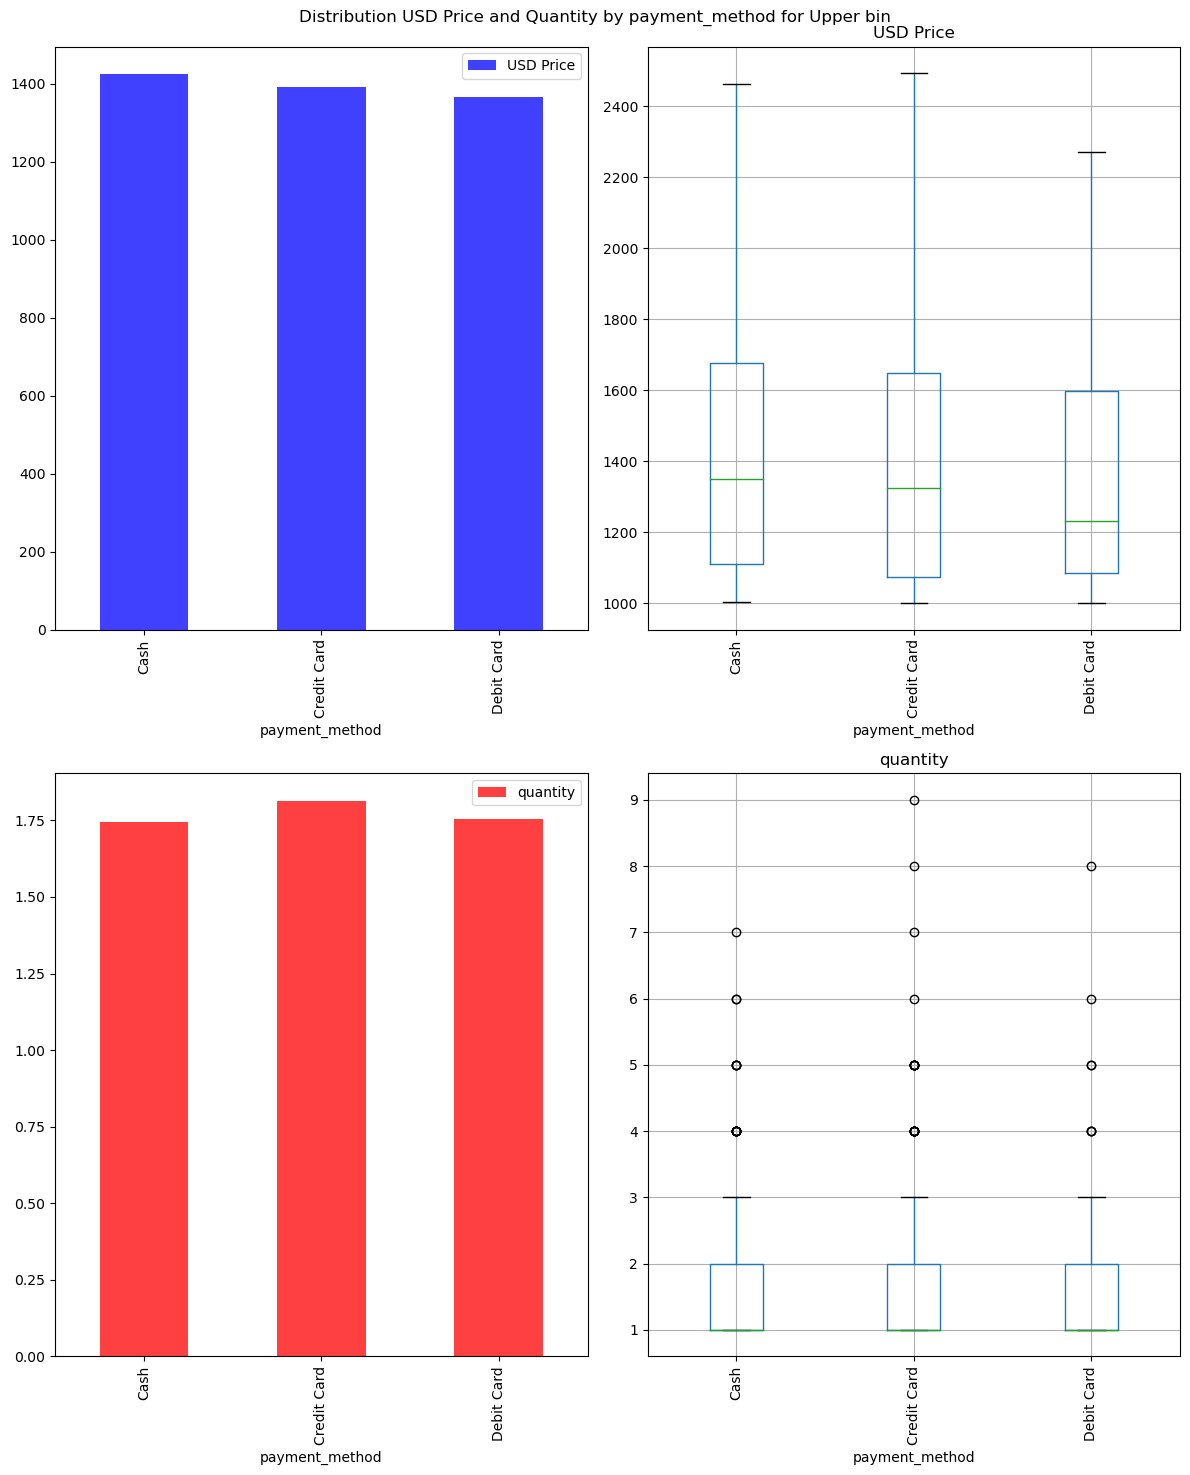

In [18]:
#Perform an ANOVA test for the distribution of Price/Cost/Quantity for each purchase by Payment Method in the Lower bin.
df = payment_method_df[(payment_method_df["Price Group"] == "Upper")]

#Display the number of transactions in each group.
print(payment_method_df[(payment_method_df["Price Group"] == "Upper")].groupby("payment_method").size())
print("\n")

metrics_distribution_by_attribute(df, attribute_name="payment_method", title_ext="for Upper bin", fig_height=15)

In [20]:
merged_df['age bin']=pd.cut(merged_df['age'], bins=5, precision=0)
merged_df.head()

,# Transaction,invoice_no,customer_id,gender,age,category,quantity,TL price,payment_method,invoice_date,shopping_mall,Latitude,Longitude,Invoice Date,Month,date for query,Temp in F,TRY-USD fx rate,USD Price,age bin
0,0,I138884,C241288,Female,28,Clothing,4,16107.36,Credit Card,5/8/2022,Kanyon,41.078039,29.010781,8/5/2022,2022-08,8/15/2022,73.3,17.912600,899.219544,"(18.0, 28.0]"
1,1,I289643,C584700,Female,43,Technology,2,490.36,Cash,22/08/2022,Kanyon,41.078039,29.010781,8/22/2022,2022-08,8/15/2022,73.3,18.105499,27.083484,"(38.0, 49.0]"
2,2,I184307,C175946,Male,22,Food & Beverage,16,370.90,Credit Card,25/08/2022,Kanyon,41.078039,29.010781,8/25/2022,2022-08,8/15/2022,73.3,18.173301,20.409061,"(18.0, 28.0]"
3,3,I818298,C204632,Male,21,Clothing,2,153.14,Debit Card,21/08/2022,Kanyon,41.078039,29.010781,8/21/2022,2022-08,8/15/2022,73.3,18.095979,8.462653,"(18.0, 28.0]"
4,4,I215578,C866033,Male,39,Cosmetics,1,88.64,Credit Card,4/8/2022,Kanyon,41.078039,29.010781,8/4/2022,2022-08,8/15/2022,73.3,17.946800,4.939042,"(38.0, 49.0]"


Statistic = 1.546745583481459, p-value = 0.18562184498913228
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of USD Price by age bin.

Statistic = 0.9191450015919479, p-value = 0.4515459189172851
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of quantity by age bin.



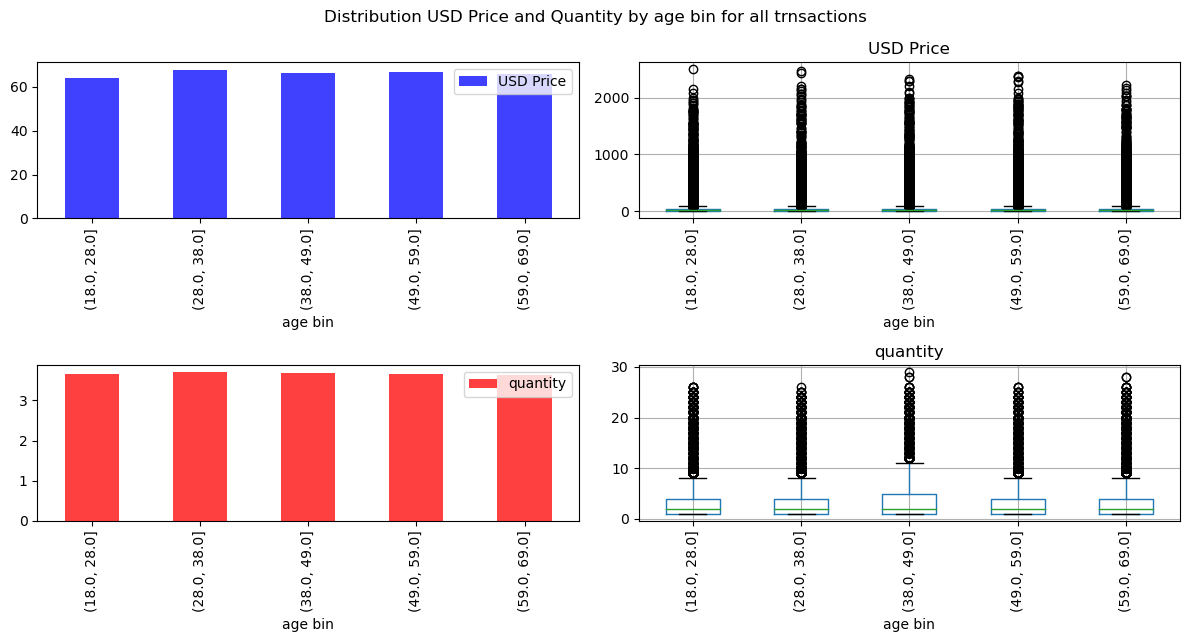

In [21]:
df = merged_df #[(merged_df["category"] == "Clothing")]

metrics_distribution_by_attribute(df, attribute_name="age bin", title_ext="for all transactions")

Statistic = 3.8705885143133245, p-value = 0.003803656863977999
H0 should be rejected, indicating that there are statistically significant differences in the distribution of USD Price by age bin.

Statistic = 1.3558177665379898, p-value = 0.24658103843683532
H0 should be accepted, indicating that there are no statistically significant differences in the distribution of quantity by age bin.



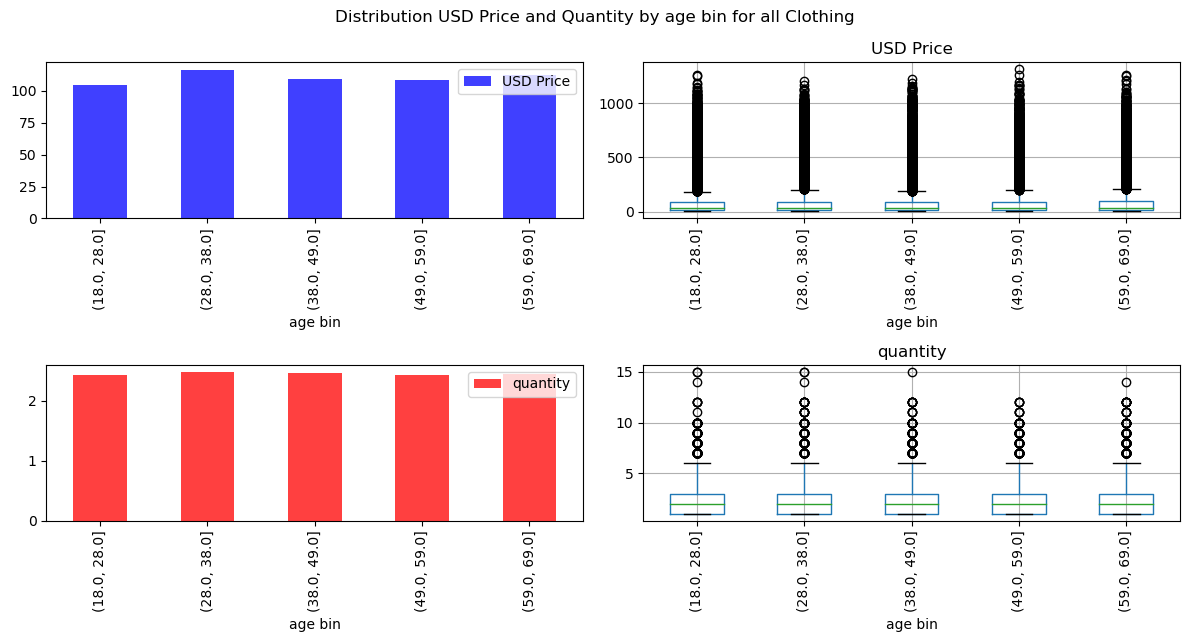

In [23]:
df = merged_df[(merged_df["category"] == "Clothing")]

metrics_distribution_by_attribute(df, attribute_name="age bin", title_ext="for all Clothing")